In [1]:
import numpy as np
import rasterio
import xarray as xr

from osgeo import gdal
import pyproj

In [2]:
# Get the transform from target dataset
with rasterio.open('../nlcd_2019_land_cover_l48_20210604/nlcd_2019_land_cover_l48_20210604.img') as src:
    T0 = src.transform

# Get the bounds on the image we are using to get the landcover class
with rasterio.open('../uhi/images/all_images.tif') as src:
    bounds = src.bounds

In [3]:
in_proj = pyproj.Proj(init='epsg:3857')
out_proj = pyproj.Proj('+proj=aea +lat_0=23 +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True')

# Convert the bounds to the projection of the landcover data
x_ll, y_ll = ~T0 *pyproj.transform(in_proj, out_proj, bounds.left, bounds.bottom)
x_ur, y_ur = ~T0 *pyproj.transform(in_proj, out_proj, bounds.right, bounds.top)
x_lr, y_lr = ~T0 *pyproj.transform(in_proj, out_proj, bounds.right, bounds.bottom)
x_ul, y_ul = ~T0 *pyproj.transform(in_proj, out_proj, bounds.left, bounds.top)

# Get the x and y extends
x_span = [x_ll, x_ul, x_lr, x_ur]
y_span = [y_ll, y_ul, y_lr, y_ur]


/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/3r/mm1k6hx10zlgnb46j7vtvxz80000gq/T/ipykernel_49774/4071015373.py:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_ll, y_ll = ~T0 *pyproj.transform(in_proj, out_proj, bounds.left, bounds.bottom)
/var/folders/3r/mm1k6hx10zlgnb46j7vtvxz80000gq/T/ipykernel_49774/4071015373.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_ur, y_ur = ~T0 *pyproj.transform(in_proj, out_proj, bounds.right

In [4]:
# Open up the image to only look at Durham
file_path = '../nlcd_2019_land_cover_l48_20210604/nlcd_2019_land_cover_l48_20210604.img'
ds = gdal.Open(file_path)
nlcd_reader = ds.GetRasterBand(1)
nlcd = nlcd_reader.ReadAsArray(int(min(x_span)), int(min(y_span)), int(max(x_span)-min(x_span)), int(max(y_span)-min(y_span)))



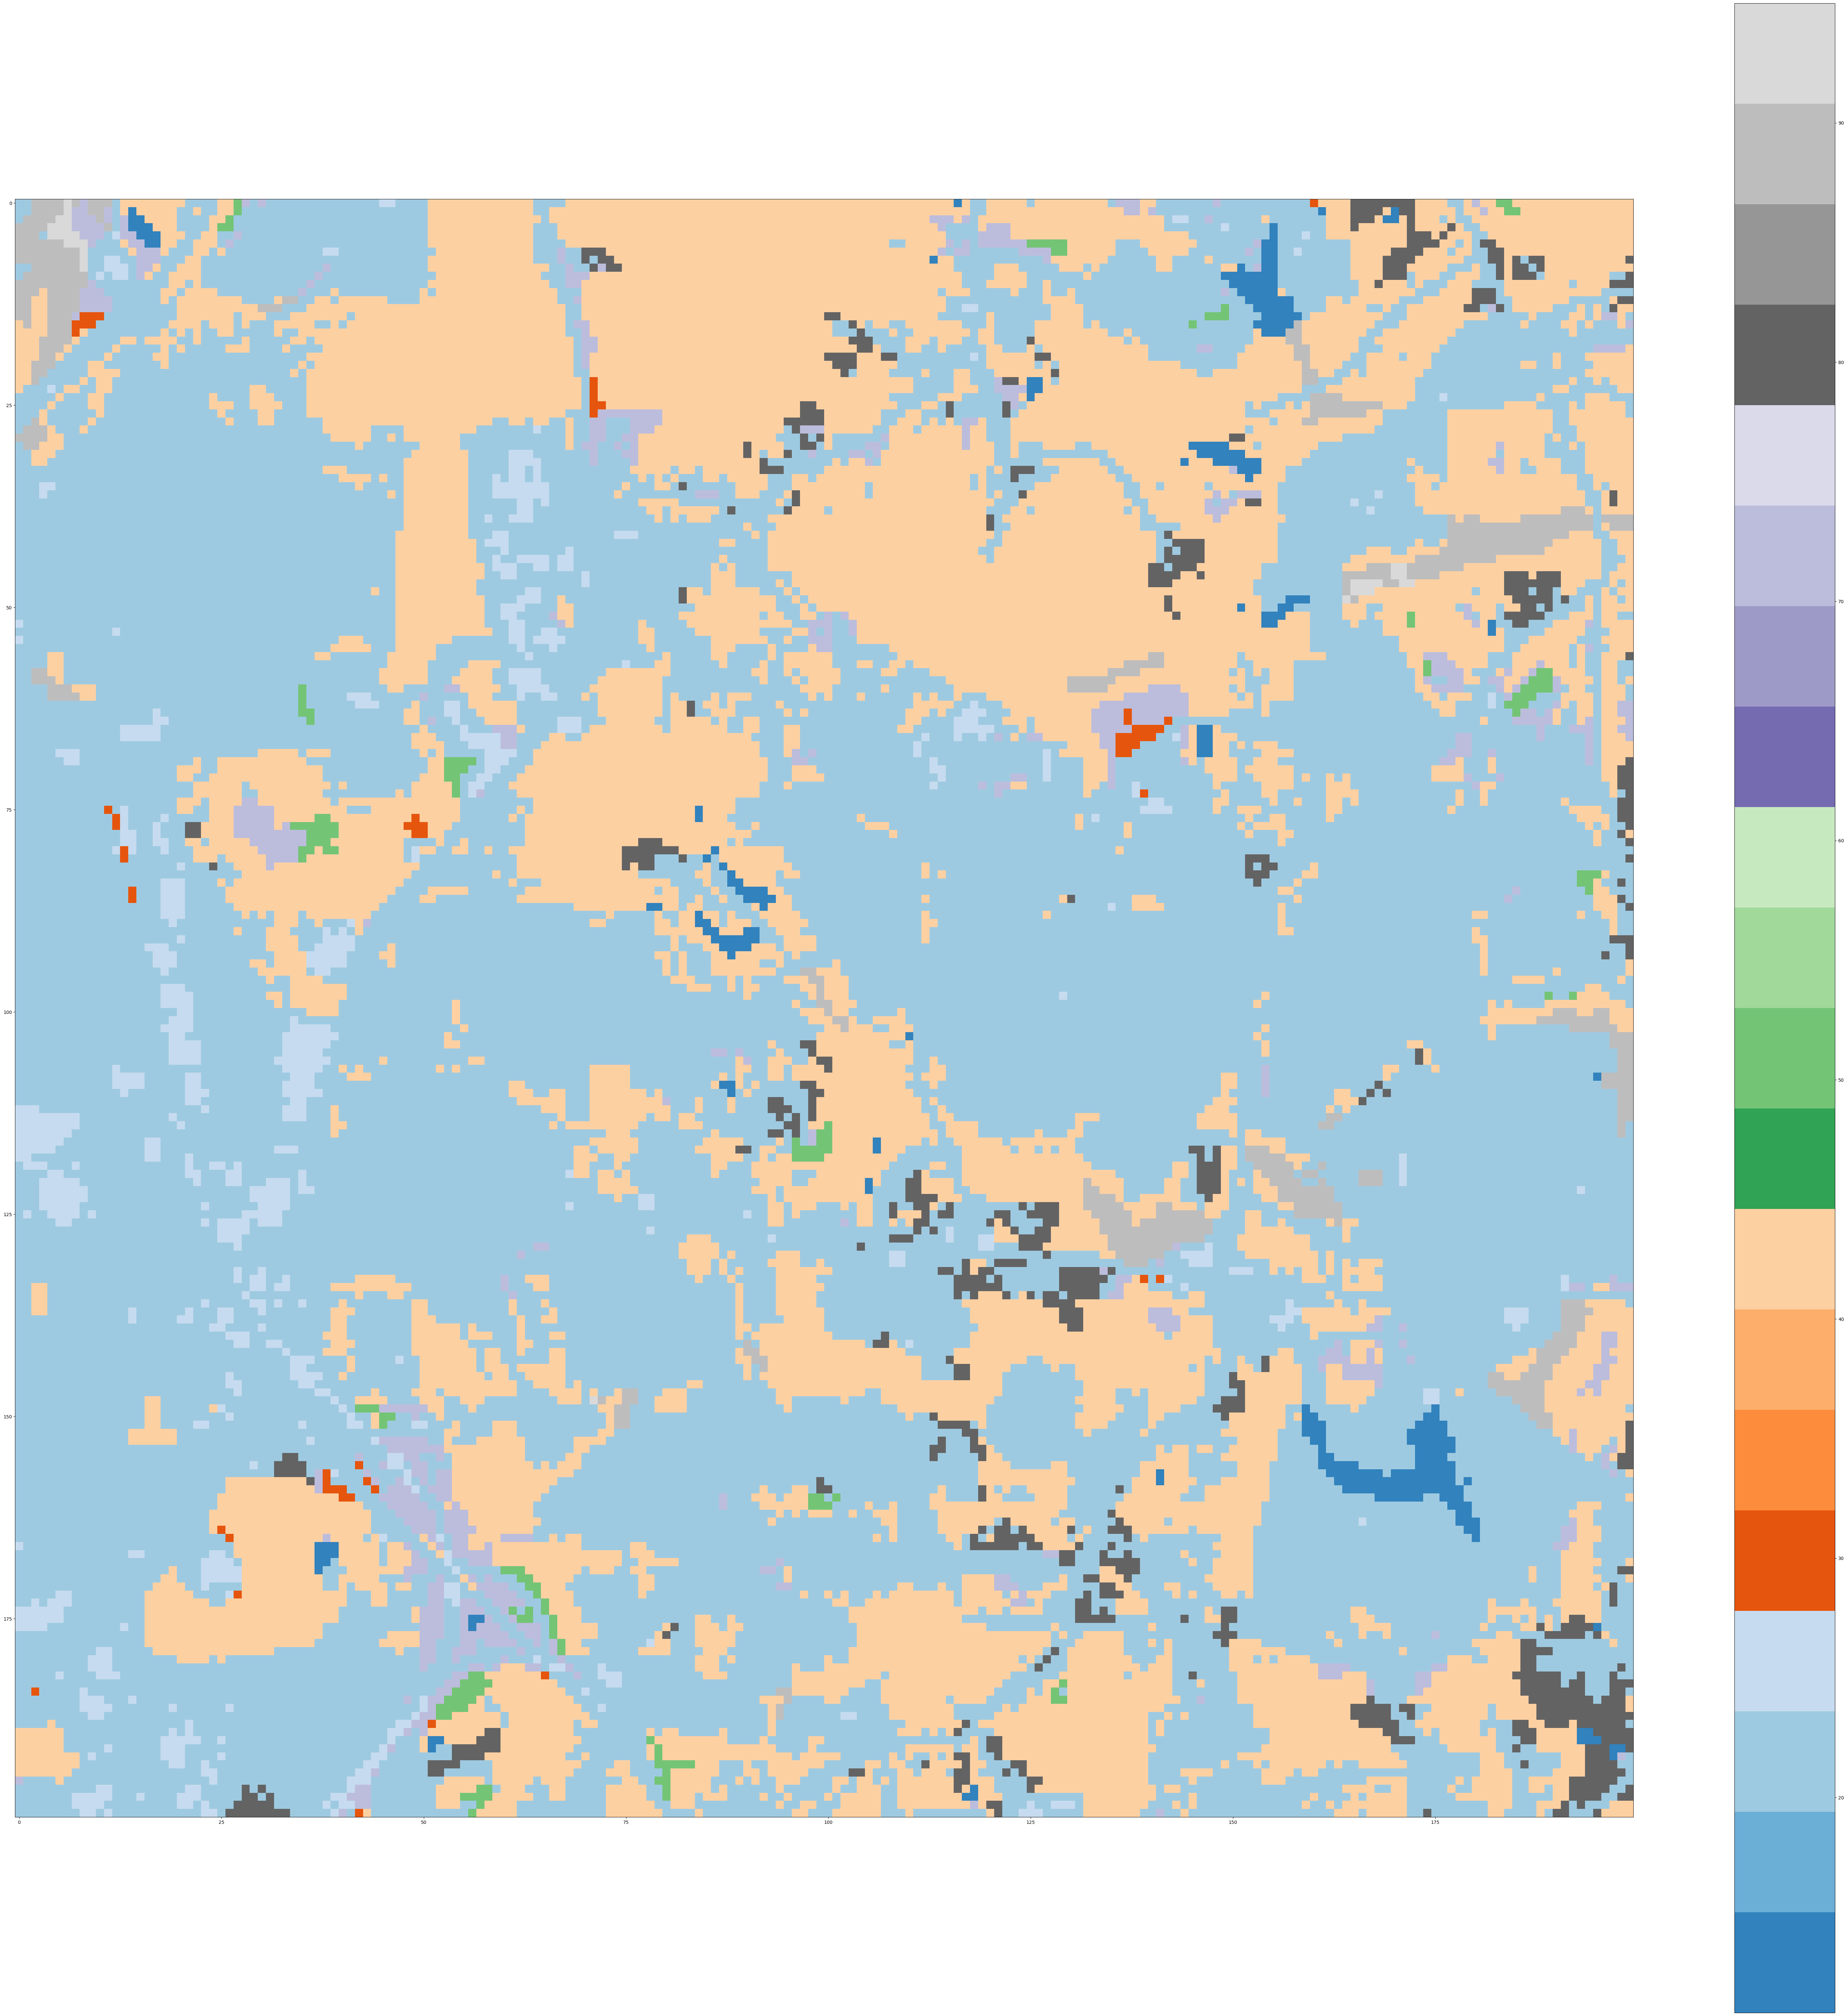

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(80,80)) 
plt.imshow(nlcd[800:1000, 800:1000], cmap='tab20c')
plt.colorbar()
plt.show()

(array([  1969., 120450.,    776.,  60226.,   1311.,      0.,      0.,
          2583.,   5923.,   6762.]),
 array([11. , 19.4, 27.8, 36.2, 44.6, 53. , 61.4, 69.8, 78.2, 86.6, 95. ]),
 <BarContainer object of 10 artists>)

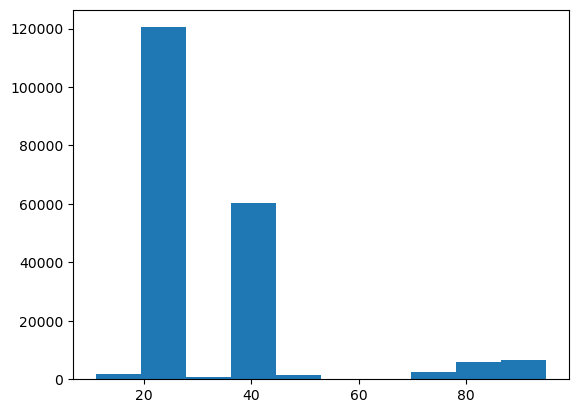

In [17]:
plt.hist(nlcd[600:1000, 500:1000].flatten())

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(nlcd, cmap='tab20c')
plt.show()

In [ ]:
set(nlcd.flatten())

AttributeError: 'Band' object has no attribute 'crs'

In [17]:
T0

Affine(30.0, 0.0, -2493045.0,
       0.0, -30.0, 3310005.0)

In [14]:
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt

# Define the bounding box for Durham, NC
min_lon, min_lat = -78.968137, 35.871593
max_lon, max_lat = -78.832715, 36.040835

# Open the NLCD data for North Carolina
with rasterio.open('../nlcd_2019_land_cover_l48_20210604/nlcd_2019_land_cover_l48_20210604.img') as src:
    # Define the bounding box for Durham in pixel coordinates
    minx, miny = src.index(min_lon, max_lat)
    maxx, maxy = src.index(max_lon, min_lat)

    # Extract the subset of the data corresponding to Durham
    subset, transform = rasterio.mask.mask(src, [(minx, miny), (maxx, maxy)])

# Plot the land cover data for Durham
plt.imshow(subset[0])
plt.show()

AttributeError: 'tuple' object has no attribute 'get'